In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, _), (x_test, _) = datasets.cifar10.load_data()

In [5]:
x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))

In [6]:
x_train, x_test = x_train/255.0, x_test/255.0 

In [7]:
y_train, y_test = x_train, x_test 

In [8]:
input_ = layers.Input(shape=(None, None, 3))
gaussian = layers.GaussianNoise(0.1)(input_)
conv1 = layers.Conv2D(64,(3,3), padding='SAME')(gaussian)
relu1 = tf.keras.activations.relu(conv1)
conv2 = layers.Conv2D(64,(3,3), padding='SAME')(relu1)
relu2 = tf.keras.activations.relu(conv2)
conv3 = layers.Conv2D(64,(3,3), padding='SAME')(relu2)
relu3 = tf.keras.activations.relu(conv3)
conv4 = layers.Conv2D(64,(3,3), padding='SAME')(relu3)
relu4 = tf.keras.activations.relu(conv4)
conv5 = layers.Conv2D(3,(3,3), padding='SAME')(relu4)
residual_added = layers.Add()([gaussian, conv5])

In [9]:
model2_train = models.Model(inputs=[input_],outputs= residual_added)

In [10]:
model2_train.compile(optimizer ='adam', loss= tf.keras.losses.MeanSquaredError())

In [11]:
model2_train.fit(x_train, y_train, epochs=100, batch_size=32)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 101s 2ms/sample - loss: 0.0020
Epoch 2/100
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.0015
Epoch 3/100
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.0015
Epoch 4/100
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.0015
Epoch 5/100
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.0015
Epoch 6/100
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.0015
Epoch 7/100
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.0015
Epoch 8/100
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.0014
Epoch 9/100
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.0014
Epoch 10/100
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.0014
Epoch 11/100
50000/50000 [==============================] - 100s 2ms/sample 

In [12]:
model2_train.save('./model2')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model2/assets


In [13]:
model2_train.save_weights('./model2_weights')

In [14]:
def Model2_test():
    input_ = layers.Input(shape=(None, None, 3))
    conv1 = layers.Conv2D(64,(3,3), padding='SAME')(input_)
    relu1 = tf.keras.activations.relu(conv1)
    conv2 = layers.Conv2D(64,(3,3), padding='SAME')(relu1)
    relu2 = tf.keras.activations.relu(conv2)
    conv3 = layers.Conv2D(64,(3,3), padding='SAME')(relu2)
    relu3 = tf.keras.activations.relu(conv3)
    conv4 = layers.Conv2D(64,(3,3), padding='SAME')(relu3)
    relu4 = tf.keras.activations.relu(conv4)
    conv5 = layers.Conv2D(3,(3,3), padding='SAME')(relu4)
    residual_added = layers.Add()([input_, conv5])
    model = tf.keras.Model(input_,residual_added)
    return model

In [15]:
model2_test = Model2_test()

In [16]:
model2_test.load_weights('./model2_weights')


Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8afc1f5dd8> and <tensorflow.python.keras.engine.base_layer.TensorFlowOpLayer object at 0x7f8afc1a7978>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8afc387710> and <tensorflow.python.keras.engine.base_layer.TensorFlowOpLayer object at 0x7f8afc3594a8>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8ba5c5f438> and <tensorflow.python.keras.engine.base_layer.TensorFlowOpLayer object at 0x7f8afc39f240>).

Two checkpoint references resolved to different objects (<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8afc359470> and <tensorflow.python.keras.engine.base_layer.TensorFlowOpLayer object at 0x7f8afc195390>).

Two checkpoint references resolved to different objects (<tensorflow.python.ker

In [17]:
image_data= []
test_image = Image.open('./noisy.png')

In [18]:
image_data.append(np.array(test_image))
image_data = np.array(image_data)

In [19]:
image_data = image_data / 255.0

In [20]:
image_data.shape

(1, 512, 512, 3)

In [21]:
model2_test.predict(image_data)

array([[[[0.8295583 , 0.51056844, 0.5321813 ],
         [0.8680787 , 0.5261902 , 0.535599  ],
         [0.8738446 , 0.53084135, 0.5414535 ],
         ...,
         [0.8825732 , 0.5209055 , 0.44899857],
         [0.8164542 , 0.4694189 , 0.3994106 ],
         [0.75522053, 0.44849858, 0.3936545 ]],

        [[0.86175764, 0.50823146, 0.49548563],
         [0.8686605 , 0.5142539 , 0.49804732],
         [0.87308   , 0.5077705 , 0.49707213],
         ...,
         [0.89828867, 0.52203035, 0.44803524],
         [0.8642733 , 0.4898939 , 0.4173385 ],
         [0.8354281 , 0.46901432, 0.41079146]],

        [[0.8648242 , 0.49236065, 0.48358798],
         [0.86989975, 0.50292826, 0.4778791 ],
         [0.87827873, 0.49097407, 0.47575915],
         ...,
         [0.91380274, 0.52909625, 0.4507215 ],
         [0.88665724, 0.50898015, 0.42389548],
         [0.878354  , 0.48697025, 0.4157938 ]],

        ...,

        [[0.3788003 , 0.12952624, 0.21602678],
         [0.3639421 , 0.13015725, 0.22866769]

In [22]:
after = model2_test.predict(image_data)

In [23]:
squeezed = np.squeeze(after)*255.0

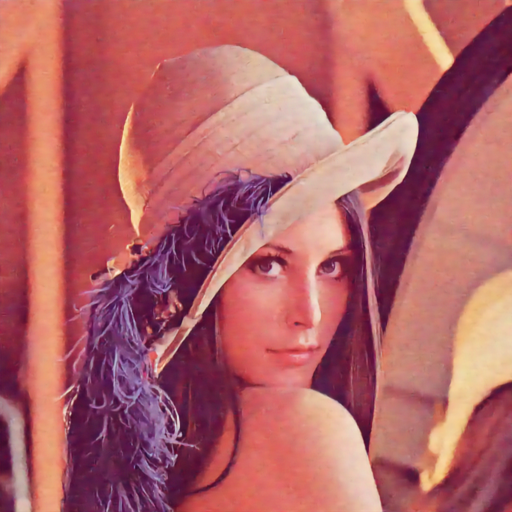

In [24]:
Image.fromarray(squeezed.astype('uint8'),'RGB')

In [25]:
output = Image.fromarray(squeezed.astype('uint8'),'RGB')

In [26]:
output.save('./Model2.png')